# Introduccion
En este proyecto utilizamos datos proporcionados por Zyfra que contiene las concentraciones de minerales como el oro,la plata y otros mas, este conjunto tiene informacion que nos ayuda a reconocer como cambia la concentracion de cada mineral en cada etapa de la purificacion del mineral.Preparemos un prototipo de un modelo de machine learning para Zyfra. La empresa desarrolla soluciones de eficiencia para la industria pesada. Para esto llevaremos a cabo las siguientes etapas.

**ETAPAS
1. Importaremos las librerias y revisaremos los datos
    * 1.1 Importar Librerias
    * 1.2 Revisar los Datos
2. Comprobaremos que el calculo de la recuperacion sea correcto
3. Analizaremos cuales son las características no disponibles en el conjunto de prueba.
4. Preprocesamiento de Datos
5. Analisis de los datos
    * 5.1 Observaremos cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.
        * 5.1.1 Cambio de Concentracion Au
        * 5.1.2 Cambio de Concentracion Ag
        * 5.1.3 Cambio de Concentracion Pb
6. Compararemos las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en   el conjunto de prueba.
7. Consideraremos las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final.
8. Construiremos nuestro modelo para calcular el valor final de sMAPE
    * 8.1 Modelo de Regresion Lineal
    * 8.2 Modelo de Arbol
    * 8.3 Modelo de Bosque
9. Conclusion

# 1. Importaremos las Librerias y Revisaremos los Datos

**1.1 Importaremos Las Librerias necesarias**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

**1.2 Revisaremos Los Datos**

In [2]:
#Leeremos los datos
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')

data_test = pd.read_csv('/datasets/gold_recovery_test.csv')

data_source = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
display(data_train.head())
print('\nnumero de valores duplicados:', data_train.duplicated().sum())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



numero de valores duplicados: 0


In [4]:
display(data_test.head())
print('\n Numero de valores duplicados:', data_test.duplicated().sum())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333



 Numero de valores duplicados: 0


In [5]:
display(data_source.head())
print('\nNumero de valores duplicados:', data_source.duplicated().sum())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



Numero de valores duplicados: 0


**OBSERVACIONES:** En nuestros 3 conjuntos de datos podemos ver que no tenemos ningun dato duplicado. Si tenemos valores ausentes pero son una cantidad muy pequeña lo cual no afectara en este momento lo dejamos asi, en caso de ser requerido en un futuro descubriremos la forma adecuada para trabajar con nuestros datos nulos. Estamos listos para continuar con nuestro analisis.

# 2. Comprobar el calculo de la recuperacion sea correcto

In [6]:
# Definir las columnas relevantes
concentrate_au = data_train['rougher.output.concentrate_au']
feed_au = data_train['rougher.input.feed_au']
tail_au = data_train['rougher.output.tail_au']

In [7]:
# Calcular la recuperación
recovery_calculated = (concentrate_au * (feed_au - tail_au)) / (feed_au * (concentrate_au - tail_au)) * 100

# Comparar con los valores reales
recovery_actual = data_train['rougher.output.recovery']

# Calcular el Error Absoluto Medio (EAM)
eam = abs(recovery_calculated - recovery_actual).mean()

# Mostrar los resultados
print("EAM entre los cálculos y los valores reales de rougher.output.recovery:", eam)

EAM entre los cálculos y los valores reales de rougher.output.recovery: 9.303415616264301e-15


**OBSERVACIONES:** Nuestro Error Absoluto Medio es muy pequeño lo cual nos indica que hay una coincidencia casi perfecta entre los cálculos y los valores reales. Lo cual significa que la diferencia entre los resultados calculados y los valores reales es extremadamente pequeña, lo que sugiere una alta precisión en el modelo o en los cálculos realizados.

# 3. Analizaremos cuales son las características no disponibles en el conjunto de prueba

In [8]:
# Identificación de características no disponibles en data_test
missing_features = set(data_source.columns) - set(data_test.columns)

# Filtrar las columnas de data_source que no están en data_test
missing_features_info = data_source[missing_features].dtypes.reset_index()
missing_features_info.columns = ['Feature', 'Data Type']

print("Características no disponibles en el conjunto de prueba (data_test):")
print(missing_features_info)

Características no disponibles en el conjunto de prueba (data_test):
                                              Feature Data Type
0                                final.output.tail_ag   float64
1                         final.output.concentrate_pb   float64
2                        final.output.concentrate_sol   float64
3              primary_cleaner.output.concentrate_sol   float64
4                                final.output.tail_pb   float64
5                       rougher.output.concentrate_pb   float64
6                     primary_cleaner.output.tail_sol   float64
7       rougher.calculation.sulfate_to_au_concentrate   float64
8                         final.output.concentrate_ag   float64
9                       rougher.output.concentrate_au   float64
10                   secondary_cleaner.output.tail_pb   float64
11                             rougher.output.tail_pb   float64
12                     primary_cleaner.output.tail_pb   float64
13                             roug

**OBSERVAIONES:** En la Columna Feature podemos ver claramente los parametros que hacen falta en el conjunto de prueba llamado `data_test`que son un total de 33 columnas y todas son de tipo float.

# 4. Preprocesamiento de Datos

**data_test**

In [9]:
# Rellenar los valores nulos del conjunto de prueba
df_test = data_test.fillna(method = 'ffill')


**data_train**

In [10]:
# Rellenar los valores nulos del conjunto de entrenamiento
df_train = data_train.fillna(method = 'ffill')
df_train.isnull().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

**data_source**

In [11]:
# Rellenar los valores nulos del conjunto de fuente
df_source = data_source.fillna(method = 'ffill')

df_source.isnull().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

**OBSERVAVIONES:** Utilizamos el metodo `ffill` para sustituir los valores nulos por los valores anteriores ya que este conjunto de datos se basa en el tiempo y los resultados son muy similares al anterior y por lo tanto optamos por utilizar el metodo `ffill` para poder usar nuestros datos en el modelo, ya que el modelo no puede trabajar con valores nulos.

# 5. Analisis de los datos

**5.1 Observaremos cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.**

  **5.1.1 Cambio de concentracion Au**

In [12]:
# Guardar las etapas de la purificacion en variables
primer_etapa_au = df_train['rougher.input.feed_au']
segunda_etapa_au = df_train['rougher.output.concentrate_au']
tercera_etapa_au = df_train['primary_cleaner.output.concentrate_au']
ultima_etapa_au = df_train['final.output.concentrate_au']

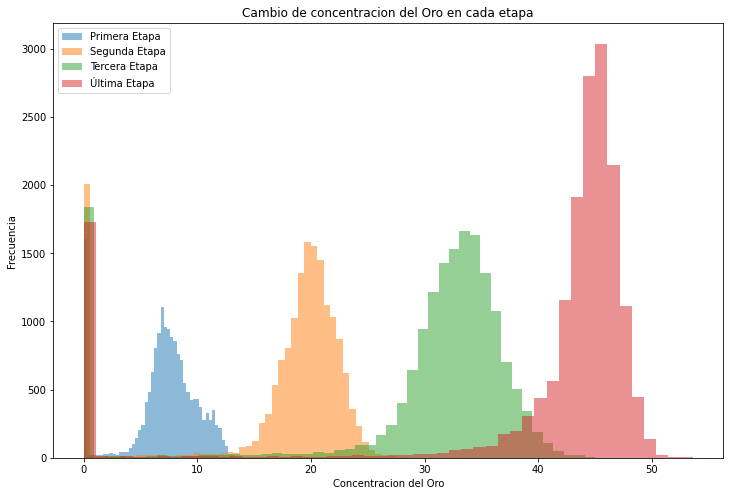

In [13]:
# Crear Histograma
plt.figure(figsize=(12, 8))

plt.hist(primer_etapa_au, bins=50, alpha=0.5, label='Primera Etapa')
plt.hist(segunda_etapa_au, bins=50, alpha=0.5, label='Segunda Etapa')
plt.hist(tercera_etapa_au, bins=50, alpha=0.5, label='Tercera Etapa')
plt.hist(ultima_etapa_au, bins=50, alpha=0.5, label='Última Etapa')

# Agregar el titulo y las etiquetas de los ejes
plt.title('Cambio de concentracion del Oro en cada etapa')
plt.xlabel('Concentracion del Oro')
plt.ylabel('Frecuencia')

# Mostrar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

**5.1.2 Cambio de concentracion Ag**

In [14]:
# Guardar las etapas de la purificacion en variables
primer_etapa_ag = df_train['rougher.input.feed_ag']
segunda_etapa_ag = df_train['rougher.output.concentrate_ag']
tercera_etapa_ag = df_train['primary_cleaner.output.concentrate_ag']
ultima_etapa_ag = df_train['final.output.concentrate_ag']

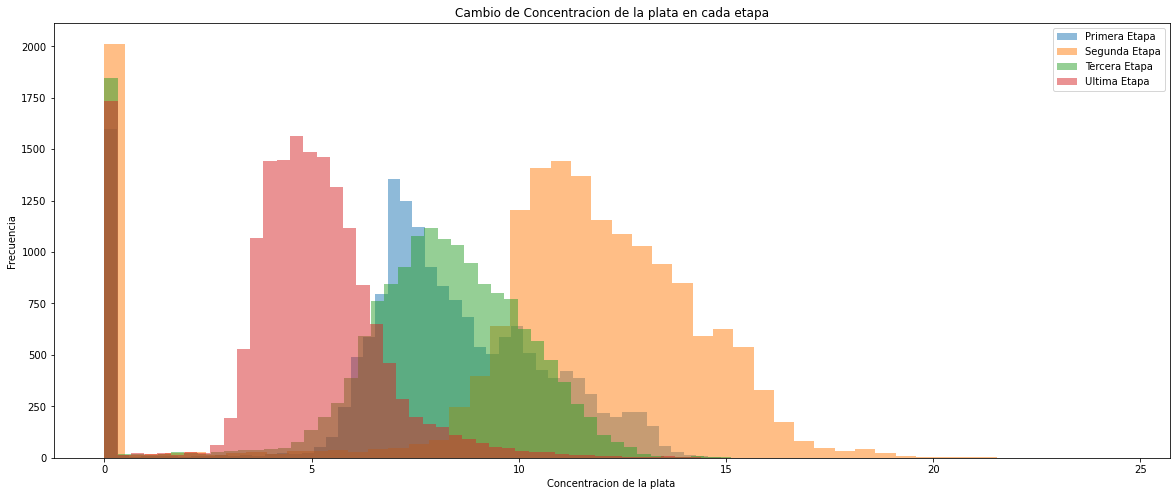

In [15]:
# Crear Histograma
plt.figure(figsize = (20,8))

plt.hist(primer_etapa_ag, bins = 50, alpha = 0.5, label = 'Primera Etapa')
plt.hist(segunda_etapa_ag, bins = 50, alpha = 0.5, label = 'Segunda Etapa')
plt.hist(tercera_etapa_ag, bins = 50, alpha = 0.5, label = 'Tercera Etapa')
plt.hist(ultima_etapa_ag, bins = 50, alpha = 0.5, label = 'Ultima Etapa')

#Agregar el titulo y las etiquetas a los ejes
plt.title('Cambio de Concentracion de la plata en cada etapa')
plt.xlabel('Concentracion de la plata')
plt.ylabel('Frecuencia')

#Mostrar la leyenda
plt.legend()

#Mostrar el Histograma
plt.show()

**5.1.3 Cambio de concentracion Pb**

In [16]:
# Guardar las etapas de la purificacion en variables
primer_etapa_pb = df_train['rougher.input.feed_pb']
segunda_etapa_pb = df_train['rougher.output.concentrate_pb']
tercera_etapa_pb = df_train['primary_cleaner.output.concentrate_pb']
ultima_etapa_pb = df_train['final.output.concentrate_pb']

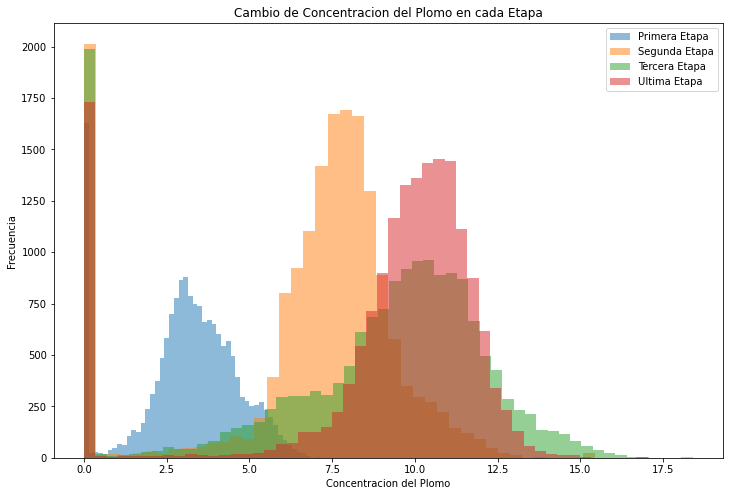

In [17]:
# Crear Histograma
plt.figure(figsize = (12,8))

plt.hist(primer_etapa_pb, bins = 50, alpha = 0.5 , label = 'Primera Etapa')
plt.hist(segunda_etapa_pb, bins = 50, alpha = 0.5, label = 'Segunda Etapa')
plt.hist(tercera_etapa_pb, bins = 50, alpha = 0.5, label = 'Tercera Etapa')
plt.hist(ultima_etapa_pb, bins = 50, alpha = 0.5, label = 'Ultima Etapa')

#Agregar el Titulo y las etiquetas a los ejes
plt.title('Cambio de Concentracion del Plomo en cada Etapa')
plt.xlabel('Concentracion del Plomo')
plt.ylabel('Frecuencia')

#Mostrar la leyenda
plt.legend()

#Mostrar el Grafico
plt.show()

**OBSERVACIONES:** Podemos ver claramente como el proceso de purificacion en cada etapa en el mineral del oro beneficia de gran manera la concentracion de este mineral, podemos ver claramente como la concentracion aumenta hasta llegar aproximadamente al 50. En el caso de la plata podemos ver que no mejora demasiado la concentracion de la plata, de hecho podemos ver que la perjudica ya que en su ulitma etapa que es representado por le histograma rojo podemos ver que es la etapa con la minima cantidad de concentracion durante todo el procceso y que llega a alcanzar un maximo de aproximadamente 19 de concentracion durante la segunda etapa. Por ultimo en el caso del plomo podemos ver que la concentracion del mineral si aumenta a travez de las etapas aunque pormode ver que en la ultimas 2 etapas no aumenta la concentracion pero si aumenta de manera significativa la cantidad de minerales con esa alta concentracion alcanzada en la tercera etapa y podemos ver que en la tercera etapa logra alcanzar su maximo de concentracion de un aproximado de 15.

# 6. Compararemos las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba.

In [18]:
# Guardar las medidas de las particulas de cada conjunto en variables diferentes
train_part_size = df_train['rougher.input.feed_size']
test_part_size = df_test['rougher.input.feed_size']

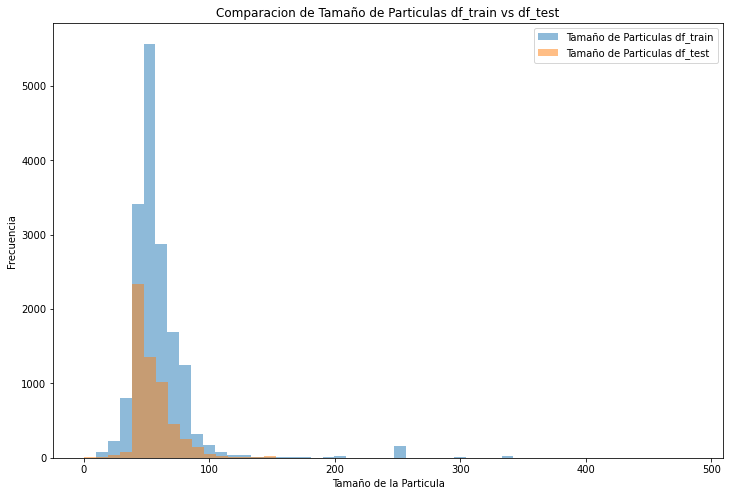

In [19]:
# Crear Histograma
plt.figure(figsize = (12,8))

plt.hist(train_part_size, bins = 50, alpha = 0.5, label = 'Tamaño de Particulas df_train')
plt.hist(test_part_size, bins = 50, alpha = 0.5, label = 'Tamaño de Particulas df_test')

# Agregar Titulo y etiquetas a los ejes
plt.title('Comparacion de Tamaño de Particulas df_train vs df_test')
plt.xlabel('Tamaño de la Particula')
plt.ylabel('Frecuencia')

# Mostrar Leyenda
plt.legend()

# Mostrar grafico
plt.show()

**OBSERVACIONES:** Las distribuciones del tamaño de las particulas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba son muy similares Gracias que las distribuciones no varían significativamente, la evaluación del modelo será correcta. Claro que las proporciones en la grafica se ven diferentes, podemos ver como el Histograma azul que representa las paticulas en el conjunto de entrenamiento absorve al histograma que contiene a las particulas del conjunto de prueba y esto es normal ya que es obvio que el conjunto de prueba tenga mucha mas frecuencia ya que tiene muchos mas datos que el conjunto de prueba, pero aun asi podemos ver que ambos claramente tienen una media similar y su distribucion es muy similar por lo tanto no varian significativamente y podemos proseguir a crear nuestro modelo.

# 7. Consideraremos las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final.

In [20]:
# Guardar las concentraciones totales en cada etapa en variables
etapa_1 = df_train[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']]
etapa_2 = df_train[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']]
etapa_3 = df_train[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']]

In [21]:
# Calcular las concentraciones totales en cada etapa
etapa_1_total = etapa_1.sum(axis=1)
etapa_2_total = etapa_2.sum(axis=1)
etapa_3_total = etapa_3.sum(axis=1)

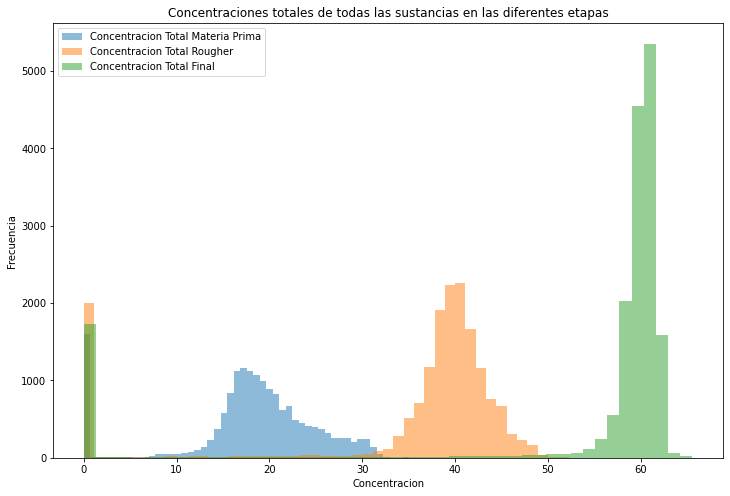

In [22]:
# Crear Histograma
plt.figure(figsize = (12,8))

plt.hist(etapa_1_total, bins = 50, alpha = 0.5, label = 'Concentracion Total Materia Prima')
plt.hist(etapa_2_total, bins = 50, alpha = 0.5, label = 'Concentracion Total Rougher')
plt.hist(etapa_3_total, bins = 50, alpha = 0.5, label = 'Concentracion Total Final')

#Agregar el titulo y etiquetas a los ejes
plt.title('Concentraciones totales de todas las sustancias en las diferentes etapas')
plt.xlabel('Concentracion')
plt.ylabel('Frecuencia')
# Mostrar Leyenda
plt.legend()

#Mostrar Grafico
plt.show()

 **OBSERVACIONES:** Nuestra grafica tiene mucho sentido, podemos ver claramente como aumente la concentracion de los metales a medida que avanzemos en las etapas de la purificacion de los minerales. Tenemos algunos valores anormales en una concentracion de 0, pudo haber sido causado por un mal registro de las concentraciones por lo cual eliminaremos las concentraciones que esten por debajo de 1 para dejar de tener estos valores anormales en nuestro histograma

In [23]:
# Elimnamos los valores menores que 1 para dejar de tener concentraciones en 0
etapa_1_norm = etapa_1_total[etapa_1_total >= 1.0]
etapa_2_norm = etapa_2_total[etapa_2_total >= 1.0]
etapa_3_norm = etapa_3_total[etapa_3_total >= 1.0]

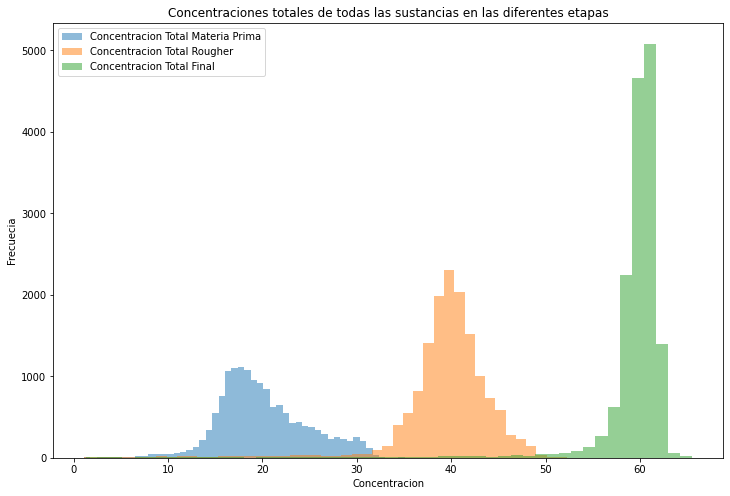

In [24]:
# Crear Histograma
plt.figure(figsize = (12,8))

plt.hist(etapa_1_norm, bins = 50, alpha = 0.5, label = 'Concentracion Total Materia Prima')
plt.hist(etapa_2_norm, bins = 50, alpha = 0.5, label = 'Concentracion Total Rougher')
plt.hist(etapa_3_norm, bins = 50, alpha = 0.5, label = 'Concentracion Total Final')

#Agregar el titulo y etiquetas a los ejes
plt.title('Concentraciones totales de todas las sustancias en las diferentes etapas')
plt.xlabel('Concentracion')
plt.ylabel('Frecuecia')
# Mostrar Leyenda
plt.legend()

#Mostrar Grafico
plt.show()

# 8. Construye el modelo

In [25]:
# Definimos features y target
features = df_test.columns.values
targets = ['rougher.output.recovery', 'final.output.recovery']

In [26]:
# Establecemos nuestras variables con el conjunto de entrenamiento
X_train = df_train[features].reset_index(drop = True)
y_train = df_train[targets].reset_index(drop = True)

y_train.columns = [0,1]

In [27]:
# Eliminamos la columna date ya que no es relevante y esta en tipo date
X_train = X_train.drop(['date'], axis = 1)

In [28]:
# Creamos nuestra funcion para calcular el valor final de sMAPE.
def compute_smape(y, y_pred):
    n = len(y)
    real = abs(y)
    pred = abs(y_pred)
    diff = abs(y - y_pred)
    smape =  (1/n)*np.sum(diff /((real + pred)/2))*100
    return smape

def smape_ponderado(y, y_pred):
    
    y_rougher = y.iloc[:,0]
    y_pred_rougher = y_pred[:,0]
    
    y_final = y.iloc[:,1]
    y_pred_final = y_pred[:,1]
    
    smape_rougher = compute_smape(y_rougher, y_pred_rougher)
    smape_final = compute_smape(y_final, y_pred_final)
    
    return (0.25*smape_rougher + 0.75*smape_final)

In [29]:
smape_scorer = make_scorer(smape_ponderado, greater_is_better=False)

**8.1 Modelo de Regresion Lineal**

In [30]:
# Creamos nuestro modelo
lr_model_v2 = LinearRegression()
lr_model_v2.fit(X_train, y_train)

LinearRegression()

In [31]:
# Nombramos a nuestro modelo y utilizamos 5 validaciones cruzadas
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train, y_train, scoring = smape_scorer, cv = 5)

In [32]:
# Obtenemos nuestro valor promedio de sMAPE
lr_final_score = lr_scores.mean()

print('Puntajes sMAPE para cada iteración:', lr_scores)
print('Modelo de Regresión Lineal | sMAPE = {:.6f}'.format(lr_final_score))

Puntajes sMAPE para cada iteración: [-17.86800384 -13.05000993 -15.84610413 -20.683037   -17.39571145]
Modelo de Regresión Lineal | sMAPE = -16.968573


**OBSERVACIONES:** Al crear nuestra funcion que nos calcule nuestro sMAPE y al utilizar la validacion cruzada con un valor de 5 en un modelo de regresion lineal, podemos obtener que nuestro valor promedio de sMAPE es de aproximadamente  un `16.96 porciento`

**8.2 Modelo de Arbol**

In [33]:
# Nombramos a nuestro modelo y utilizamos 5 validaciones cruzadas
tree_model = DecisionTreeRegressor(random_state=123)
tree_model.fit(X_train, y_train)
tr_scores = cross_val_score(tree_model, X_train, y_train, scoring = smape_scorer, cv = 5)

In [34]:
# Obtenemos nuestro valor promedio de sMAPE
tr_final_score = tr_scores.mean()

print('Puntajes sMAPE para cada iteración:', tr_scores)
print('Modelo de Arbol de Regresion | sMAPE = {:.6f}'.format(tr_final_score))

Puntajes sMAPE para cada iteración: [-26.82779347 -32.09465281 -19.74102845 -29.0278705  -25.59163547]
Modelo de Arbol de Regresion | sMAPE = -26.656596


**OBSERVACIONES:** Al crear nuestra funcion que nos calcule nuestro sMAPE y al utilizar la validacion cruzada con un valor de 5 en un modelo de Arbol de Regresion, podemos obtener que nuestro valor promedio de sMAPE es de aproximadamente  un `-26.65 porciento` siendo el mejor hasta el momento.

**8.1.3 Modelo de Bosque**

In [35]:
random_forest_model = RandomForestRegressor(random_state=12345,n_estimators=100, max_depth=8)
random_forest_model.fit(X_train, y_train)
rf_scores = cross_val_score(random_forest_model, X_train, y_train, scoring = smape_scorer, cv = 5)

In [36]:
# Obtenemos nuestro valor promedio de sMAPE
rf_final_score = rf_scores.mean()

print('Puntajes sMAPE para cada iteración:', rf_scores)
print('Modelo de Arbol de Regresion | sMAPE = {:.6f}'.format(rf_final_score))

Puntajes sMAPE para cada iteración: [-13.03099049 -13.11199948 -14.61692718 -20.10652725 -14.62684049]
Modelo de Arbol de Regresion | sMAPE = -15.098657


**OBSERVACIONES:** Al crear nuestra funcion que nos calcule nuestro sMAPE y al utilizar la validacion cruzada con un valor de 5 en un modelo de Bosque de Regresion, podemos obtener que nuestro valor promedio de sMAPE es de aproximadamente  un `-15.09 porciento` siendo el peor de todos.

# 9. Conclusion
Al realizar este proyecto descubrimos la importancia de emplear la tecnica de la validacion cruzada y como nos ayudo a obtener un mejor promedio de nuestro sMAPE o Error Porcentual Absoluto Medio Simétrico. De este proyecto me gustaria destacar cuatro puntos.

1. El proceso de purificacion ayuda en gran manera al mineral del Oro en su concentracion.
2. De forma general en todas las sustancias el proceso de purificacion ayuda a mejorar la concentracion de los minerales.
3. La validacion cruzada nos ayuda de gran manera a poder obtener un Error Porcentual Absoluto Medio Simétrico mas certero.
4. Nuestro modelo con mejor valor de sMAPE es un arbol de decisión con un `-26.65 porciento`.